In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr

In [3]:
# Loading the data
marketing_data = pd.read_csv('marketing_data.csv')

In [4]:
# Inspecting the data
print(f"Sales Head:\n{marketing_data.head()}")
print(f"Sales Tail:\n{marketing_data.tail()}")
print()

Sales Head:
      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0

In [5]:
# Printing a summary of the data
print(f"Sales data summary:\n{marketing_data.info}")
print()

Sales data summary:
<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00         0   
1         1        1961  Graduation         Single  $57,091.00         0   
2     10476        1958  Graduation        Married  $67,267.00         0   
3      1386        1967  Graduation       Together  $32,474.00         1   
4      5371        1989  Graduation         Single  $21,474.00         1   
...     ...         ...         ...            ...          ...      ...   
2235  10142        1976         PhD       Divorced  $66,476.00         0   
2236   5263        1977    2n Cycle        Married  $31,056.00         1   
2237     22        1976  Graduation       Divorced  $46,310.00         1   
2238    528        1978  Graduation        Married  $65,819.00         0   
2239   4070        1969         PhD        Married  $94,871.00         0   

      Teenhome Dt_Customer  Recency

In [6]:
# Checking for missing values
print(f"Count of missing values:\n{marketing_data.isna().sum()}")
print(f"Count of null values:\n{marketing_data.isnull().sum()}")
print()

Count of missing values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
Count of null values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Rece

## Initial Assessment
* There are 2240 rows x 28 columns
* There are missing / null values on the Income column
* There are some columns with an extra space on its name, which could cause issues down the road

In [7]:
# Print all column names
print(f"Column names: {marketing_data.columns}")
print()

Column names: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')



In [8]:
# Fixing Income colum, removing extra spaces
marketing_data.rename(columns={' Income ': 'Income'}, inplace=True)
print(f"Column names: {marketing_data.columns}")
print()

Column names: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')



In [9]:
# Since the missing values are all on the Income column, decided to replace them with a zero
marketing_data['Income'] = marketing_data['Income'].fillna(0)
print(f"Count of null values:\n{marketing_data.isnull().sum()}")
print()

Count of null values:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64



## Analysis - Data Cleaning
* No null values remains
* All columns were renamed to remove extra spaces

In [10]:
# Converting the columns to their own data format
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'], format='%m/%d/%y')
print(f"Dt_Customer type column is now {marketing_data['Dt_Customer'].dtype}")

Dt_Customer type column is now datetime64[ns]


In [16]:
# Cleaning the data on the columns with strings
marketing_data['Education'] = marketing_data['Education'].str.strip().replace({'2n Cycle': '2nd Cycle'})
print(f"Unique values in Education column: {marketing_data['Education'].unique()}")
print()

print(f"Unique values in Marital_Status column: {marketing_data['Marital_Status'].unique()}")
print(f"Count of unique values in Marital column: {marketing_data['Marital_Status'].value_counts()}")
print()

# Replace invalid entries with 'Other'
valid_statuses = ['Divorced', 'Single', 'Married', 'Together', 'Widow']
marketing_data['Marital_Status'] = marketing_data['Marital_Status'].apply(
    lambda x: x if x in valid_statuses else 'Other'
)

print(f"Unique values in Marital_Status column: {marketing_data['Marital_Status'].unique()}")
print()

Unique values in Education column: ['Graduation' 'PhD' '2nd Cycle' 'Master' 'Basic']

Unique values in Marital_Status column: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Other']
Count of unique values in Marital column: Married     864
Together    580
Single      480
Divorced    232
Widow        77
Other         7
Name: Marital_Status, dtype: int64

Unique values in Marital_Status column: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Other']



In [17]:
country_map = {
    'SP': 'Spain',
    'CA': 'Canada',
    'US': 'USA',
    'AUS': 'Australia',
    'GER': 'Germany',
    'IND': 'India',
    'SA': 'South Africa',
    'ME': 'Mexico'
}
marketing_data['Country'] = marketing_data['Country'].map(country_map)
print(f"Unique values in Country column: {marketing_data['Country'].unique()}")
print()

Unique values in Country column: ['Spain' 'Canada' 'USA' 'Australia' 'Germany' 'India' 'South Africa'
 'Mexico']



In [18]:
# Remove currency symbols and commas, then convert to float
marketing_data['Income'] = (marketing_data['Income']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)
print(f"Income type column is now {marketing_data['Income'].dtype}")
print(f"Income values: {marketing_data['Income']}")

Income type column is now float64
Income values: 0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64


## Analysis - Data Cleaning
* Education, Marital Status, Country and Income columns normalized

In [19]:
# Fixing the Null income values based on Education and Marital Status
group_means = marketing_data.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
 # Grouping the unique dataframe by Education and Marital Status. This gets every combination of these two
 # Then getting the Income column 
 # Then calculating the mean
 # Keeps the value on each line of the dataframe
 # Below we replace the missing values with the newly calculate ones
marketing_data['Income'] = marketing_data['Income'].fillna(group_means)
print("Missing values in Income after imputation:", marketing_data['Income'].isnull().sum())
print()

Missing values in Income after imputation: 0



## Analysis - Data Cleaning - Income
* Missing values from the Income column were replaced by the average of the same group combination of Education and Marital Status.

In [20]:
# Creating variables to represent total children (kid or Teen), Customer Age, Total Spending and Total Purchases
# ChildrenHome: 1 if either Kidhome or Teenhome > 0, else 0
marketing_data['ChildrenHome'] = ((marketing_data['Kidhome'] > 0) | (marketing_data['Teenhome'] > 0)).astype(int)

# Age: current year minus Year_Birth
current_year = datetime.now().year
marketing_data['Age'] = current_year - marketing_data['Year_Birth']

# MntTotal: total spending across all product categories
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
marketing_data['MntTotal'] = marketing_data[spending_cols].sum(axis=1)

# Total_Purchases: sum of purchases across web, catalog, and store
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
marketing_data['Total_Purchases'] = marketing_data[purchase_cols].sum(axis=1)

# Printing a summary of the data
print(f"Sales data summary:\n{marketing_data.info}")
print()

Sales data summary:
<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977   2nd Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0 

In [21]:
# Treating Outliers
# Creating a Log-Based column for MntTotal
marketing_data['MntLog'] = np.log(marketing_data['MntTotal'] + 1)

# Remove unrealistic age outliers
marketing_data = marketing_data[marketing_data['Age'] <= 95]

# Remove unrealistic income outliers
marketing_data = marketing_data[marketing_data['Income'] <= 150000]

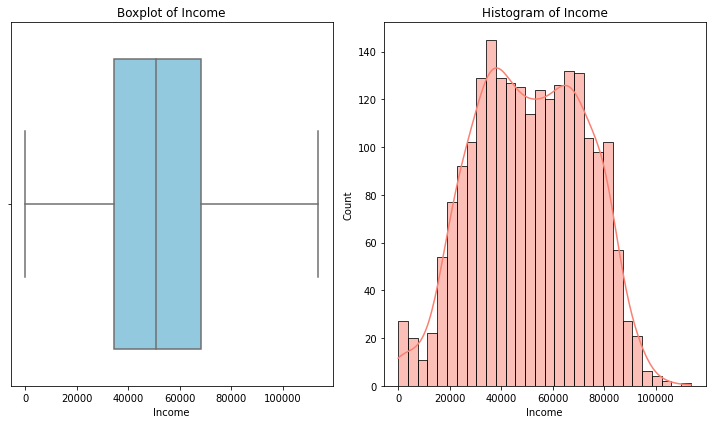

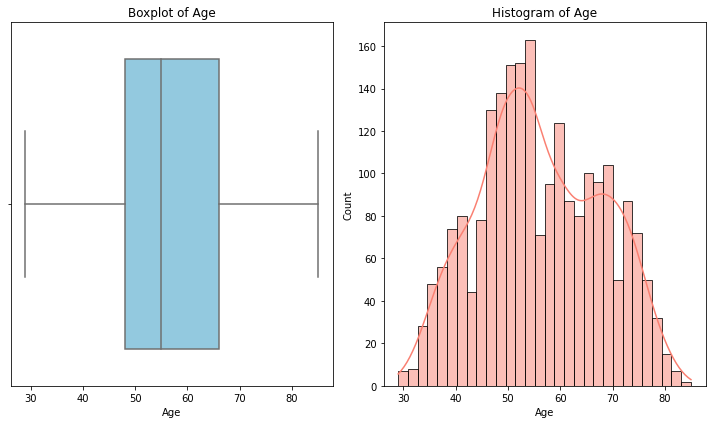

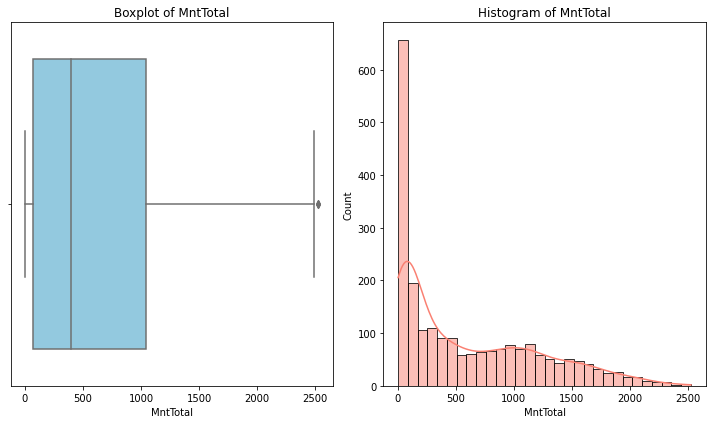

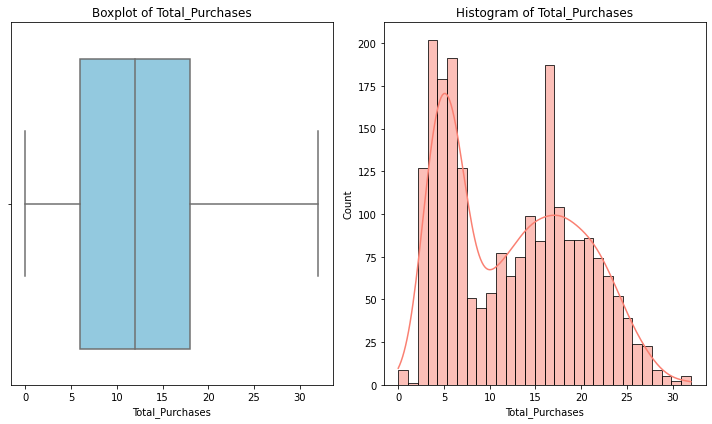

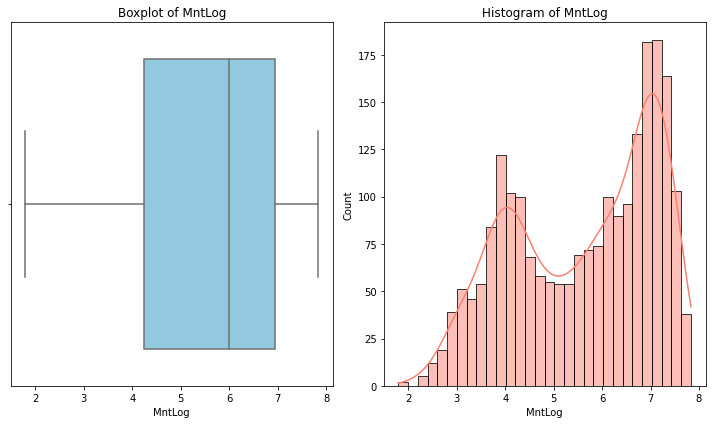

In [22]:
# Generate box plots and histograms to gain insights into the distributions and identify outliers.
columns_to_plot = ['Income', 'Age', 'MntTotal', 'Total_Purchases','MntLog']
for col in columns_to_plot:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Boxplot
    sns.boxplot(data=marketing_data, x=col, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Boxplot of {col}')
    
    # Histogram
    sns.histplot(data=marketing_data, x=col, bins=30, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f'Histogram of {col}')
    
    # Adjust layout
    plt.tight_layout()
plt.show()

In [23]:
#  Apply ordinal encoding for education and one-hot encoding bfor marital status and country.
print(f"Count of unique values in Education column: {marketing_data['Education'].value_counts()}")

# Ordinal encoding for Education
education_order = ['Basic', 'High School', 'Graduation', '2nd Cycle', 'Master', 'PhD']
education_map = {level: i for i, level in enumerate(education_order)}
marketing_data['Education_Encoded'] = marketing_data['Education'].map(education_map)

# One-hot encoding for Marital Status and Country
marketing_data = pd.get_dummies(marketing_data, columns=['Marital_Status', 'Country'], prefix=['Marital', 'Country'])

# Printing a summary of the data
print(f"Sales data summary:\n{marketing_data.info}")
print()

print(f"Column names: {marketing_data.columns}")
print()

Count of unique values in Education column: Graduation    1124
PhD            481
Master         369
2nd Cycle      201
Basic           54
Name: Education, dtype: int64
Sales data summary:
<bound method DataFrame.info of          ID  Year_Birth   Education   Income  Kidhome  Teenhome Dt_Customer  \
0      1826        1970  Graduation  84835.0        0         0  2014-06-16   
1         1        1961  Graduation  57091.0        0         0  2014-06-15   
2     10476        1958  Graduation  67267.0        0         1  2014-05-13   
3      1386        1967  Graduation  32474.0        1         1  2014-05-11   
4      5371        1989  Graduation  21474.0        1         0  2014-04-08   
...     ...         ...         ...      ...      ...       ...         ...   
2235  10142        1976         PhD  66476.0        0         1  2013-03-07   
2236   5263        1977   2nd Cycle  31056.0        1         0  2013-01-22   
2237     22        1976  Graduation  46310.0        1         0  201

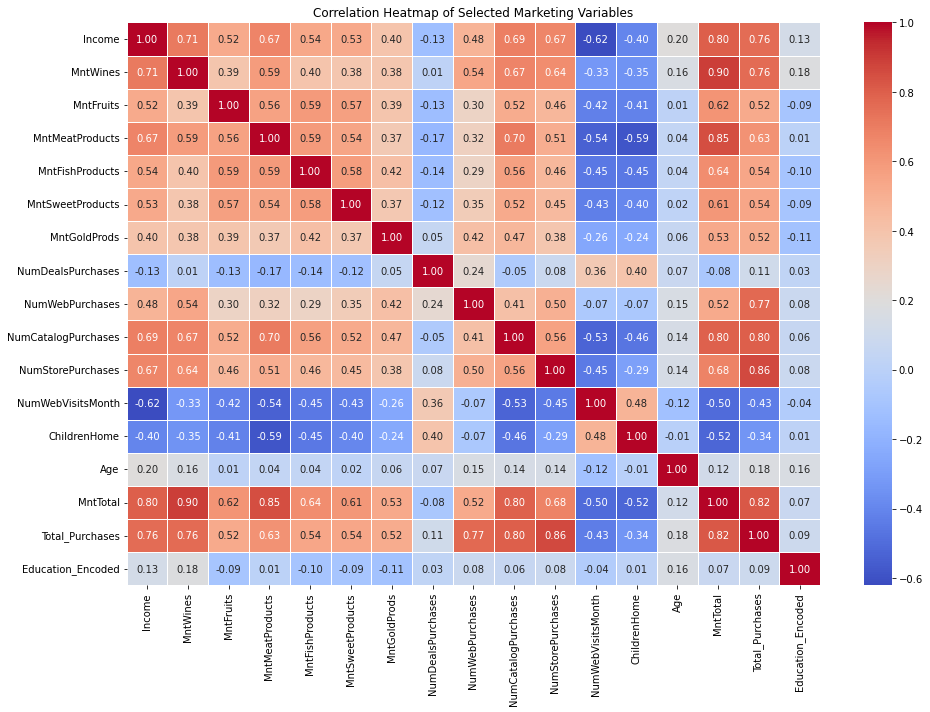

In [24]:
# Generate a heatmap to illustrate the correlation between different pairs of variables.
# Select relevant columns
selected_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'ChildrenHome', 'Age', 'MntTotal', 'Total_Purchases',
    'Education_Encoded'
]

# Compute correlation matrix
correlation_matrix = marketing_data[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Marketing Variables")
plt.tight_layout()
plt.show()

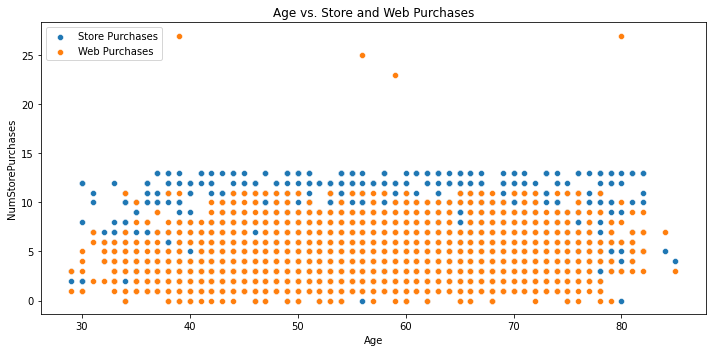

Correlation between Age and Store Purchases: 0.14
Correlation between Age and Web Purchases: 0.15


In [26]:
# Hypothesis tests
# Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=marketing_data, x='Age', y='NumStorePurchases', label='Store Purchases')
sns.scatterplot(data=marketing_data, x='Age', y='NumWebPurchases', label='Web Purchases')
plt.title("Age vs. Store and Web Purchases")
plt.legend()
plt.tight_layout()
plt.show()

store_corr, _ = pearsonr(marketing_data['Age'], marketing_data['NumStorePurchases'])
web_corr, _ = pearsonr(marketing_data['Age'], marketing_data['NumWebPurchases'])
print(f"Correlation between Age and Store Purchases: {store_corr:.2f}")
print(f"Correlation between Age and Web Purchases: {web_corr:.2f}")

## Analysis - Hypothesis A: Age vs. Store and Web Purchases
* Both cases show positive but very wek correlations
* Result: Reject the hypothesis as the data does not show a meaningful preference for store purchases among older individuals.

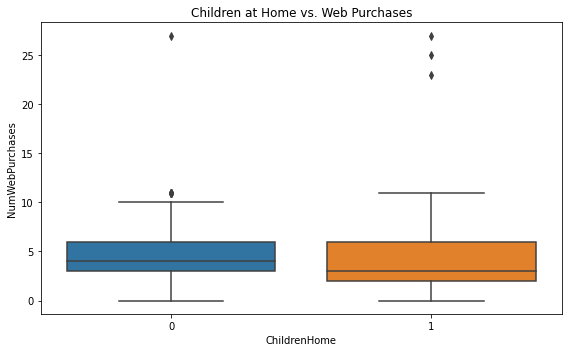

ChildrenHome = 0, Mean Web Purchases = 4.42
ChildrenHome = 1, Mean Web Purchases = 3.97


In [27]:
# Customers with children likely experience time constraints, making online shopping a more convenient option.
plt.figure(figsize=(8, 5))
sns.boxplot(data=marketing_data, x='ChildrenHome', y='NumWebPurchases')
plt.title("Children at Home vs. Web Purchases")
plt.tight_layout()
plt.show()

# Group comparison
children_groups = marketing_data.groupby('ChildrenHome')['NumWebPurchases']
for group, values in children_groups:
    print(f"ChildrenHome = {group}, Mean Web Purchases = {values.mean():.2f}")

## Analysis - Hypothesis B: Children at home vs. Web Purchases
* Medians are very similar. Visual and statistical difference is minimal.
* Outliers exist in both groups
* Result: Reject the hyphotesis as the data does not show a meaningful increase in web purchases among customers with children at home.

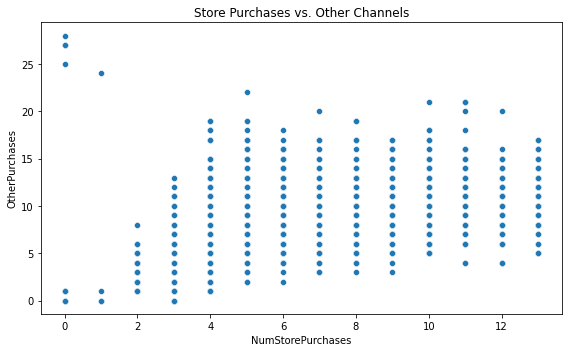

Correlation between Store Purchases and Other Channels: 0.63


In [29]:
marketing_data['OtherPurchases'] = marketing_data['NumWebPurchases'] + marketing_data['NumCatalogPurchases']
plt.figure(figsize=(8, 5))
sns.scatterplot(data=marketing_data, x='NumStorePurchases', y='OtherPurchases')
plt.title("Store Purchases vs. Other Channels")
plt.tight_layout()
plt.show()

store_other_corr, _ = pearsonr(marketing_data['NumStorePurchases'], marketing_data['OtherPurchases'])
print(f"Correlation between Store Purchases and Other Channels: {store_other_corr:.2f}")

## Analysis - Hypothesis C: Store vs. Other Channels (Web + Catalog)
* A correlation of 0.63 is a moderately strong positive correlation.
* Customers who buy more in-store also tend to buy more through other channels.
* This does not support the idea of cannibalization, which would imply a negative correlation,
* Result: Reject the hypothesis as the data shows that store and other channels increase togheter, not at the expense of one another.

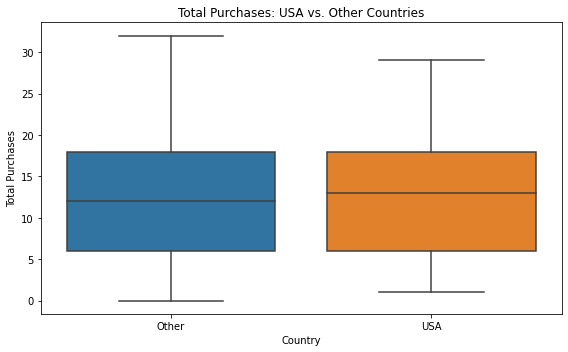

T-test result for USA vs. Other Countries in Total Purchases:
T-statistic = 1.25, p-value = 0.2138


In [30]:
# Does the United States significantly outperform the rest of the world in total purchase volumes?
marketing_data['Country_Group'] = marketing_data['Country_USA'].apply(lambda x: 'USA' if x == 1 else 'Other')

plt.figure(figsize=(8, 5))
sns.boxplot(x=marketing_data['Country_Group'], y=marketing_data['Total_Purchases'])
plt.title("Total Purchases: USA vs. Other Countries")
plt.xlabel("Country")
plt.ylabel("Total Purchases")
plt.tight_layout()
plt.show()

# Define groups for t-test
usa_purchases = marketing_data.loc[marketing_data['Country_Group'] == 'USA', 'Total_Purchases']
other_purchases = marketing_data.loc[marketing_data['Country_Group'] == 'Other', 'Total_Purchases']

# Statistical test
t_stat, p_val = ttest_ind(usa_purchases, other_purchases, equal_var=False)
print(f"T-test result for USA vs. Other Countries in Total Purchases:\nT-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

## Analysis - Hypothesis D: USA vs. Other Countries in Total Purchases
* Median total purchases for USA and Other countries are nearly thre same.
* Spread is similar, though USA has a lsight wider range
* Min/Max values are comparable.
* T-Statistic: 1.25
* P-Value = 0.2138
* Result: Reject the hypothesis as the data does not show statistical difference in total purchase volumes between USA and other countries.


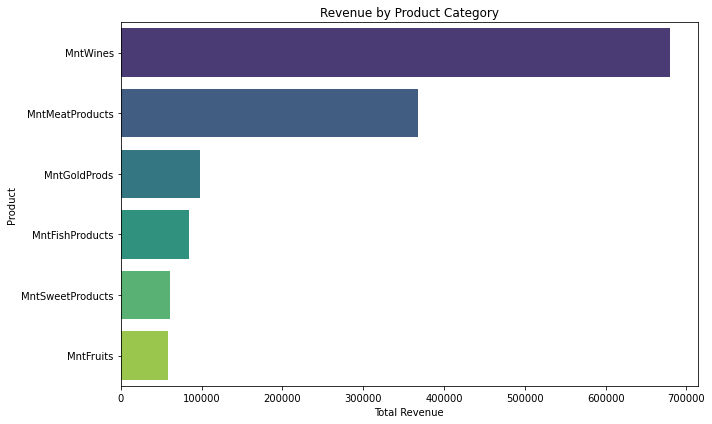

In [31]:
# Visualizations
# Identify the top-performing products and those with the lowest revenue.
product_revenue = marketing_data[spending_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='viridis')
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

## Analysis - Revenue by Product
* Wine is the product with the most revenue, Fruits is the lowest.

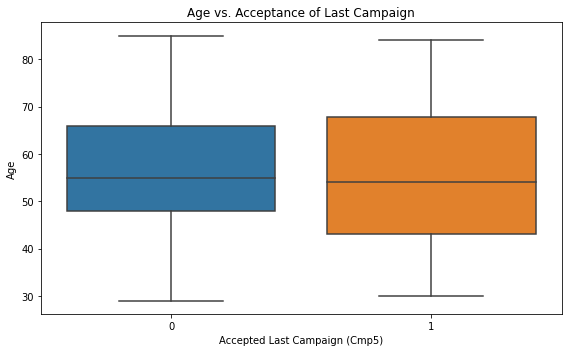

In [32]:
# Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
plt.figure(figsize=(8, 5))
sns.boxplot(x=marketing_data['AcceptedCmp5'], y=marketing_data['Age'])
plt.title("Age vs. Acceptance of Last Campaign")
plt.xlabel("Accepted Last Campaign (Cmp5)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

## Analysis - Age vs. Last Campaign Acceptance 
* The boxplot shows similar age distributions for both groups (accepted vs. not accepted).
* Median age is slightly lower for those who accepted the campaign.
* No strong visual indication of age being a major factor in campaign acceptance.

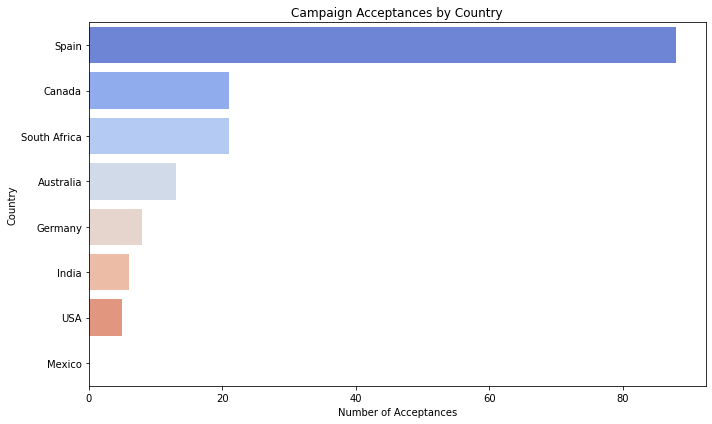

In [33]:
# Determine the country with the highest number of customers who accepted the last campaign.
country_columns = ['Country_Australia', 'Country_Canada', 'Country_Germany', 'Country_India','Country_Mexico', 'Country_South Africa', 'Country_Spain', 'Country_USA']
acceptances_by_country = {
    country.split('_')[1]: marketing_data.loc[marketing_data[country] == 1, 'AcceptedCmp5'].sum()
    for country in country_columns
}

# Convert to DataFrame for plotting
acceptances_df = pd.DataFrame(list(acceptances_by_country.items()), columns=['Country', 'AcceptedCmp5'])
acceptances_df.sort_values(by='AcceptedCmp5', ascending=False, inplace=True)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='AcceptedCmp5', y='Country', data=acceptances_df, palette='coolwarm')
plt.title("Campaign Acceptances by Country")
plt.xlabel("Number of Acceptances")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## Analysis - Campaign Acceptances by Country 
* Spain is the country with the highest number of customers who accepted the last campaign.

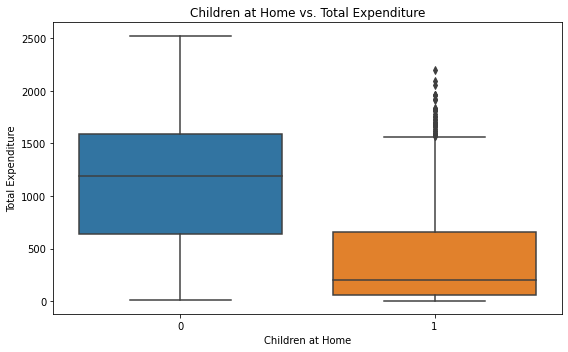

In [34]:
# Investigate if there is a discernible pattern in the number of children at home and the total expenditure.
plt.figure(figsize=(8, 5))
sns.boxplot(x=marketing_data['ChildrenHome'], y=marketing_data['MntTotal'])
plt.title("Children at Home vs. Total Expenditure")
plt.xlabel("Children at Home")
plt.ylabel("Total Expenditure")
plt.tight_layout()
plt.show()

## Analysis - Children at Home vs. Total Expenditure 
* Customers without children at home show a higher median and have a wider range. Likely spend more overall.
* Customers with children aat home show a lower median and many outliers. Overall, spending is lower and more concentrated.

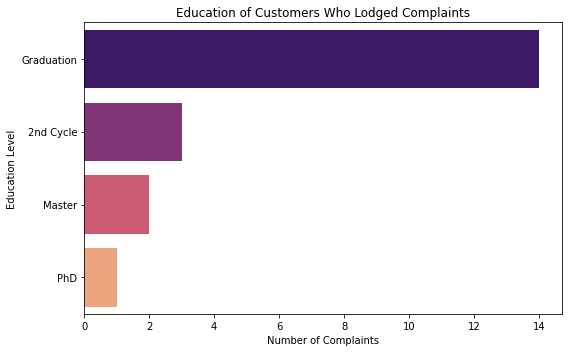

In [35]:
# Analyze the educational background of customers who lodged complaints in the last two years move on
complaints_education = marketing_data[marketing_data['Complain'] == 1]['Education'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=complaints_education.values, y=complaints_education.index, palette='magma')
plt.title("Education of Customers Who Lodged Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()

In [ ]:
## Analysis - Complaints by Education 
* Graduated customers lodged the most complaints, followed by 2nd Cycle, Masters and PhD.
* This suggests that these groups are more engaged, crytical or have higher expecttations.